In [20]:
# Pull from coinmarketcap API using API Key
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3a42ee6b-f434-4013-bf99-802d817e1d06',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-11T22:22:57.181Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 8982}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10865, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [21]:
type(data)

dict

In [22]:
import pandas as pd

# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
# normalize json data and add a timestamp column
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now', utc='true')

In [24]:
# function to automate pulling from the API
def api_pull():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3a42ee6b-f434-4013-bf99-802d817e1d06',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now', utc='true')
    df_append = pd.DataFrame(df2) #append each pull to the current dataframe
    df = pd.concat([df,df_append])
    

In [25]:
import os
from time import time
from time import sleep

# activate api pull function every 60 seconds
for i in range(333):
    api_pull()
    print('API Pull Successful')
    sleep(60)
exit()

API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful


KeyboardInterrupt: 

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10865,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19651693.00000,19651693.00000,False,NaN,1,None,None,None,2024-03-11T22:22:00.000Z,72715.12471,66696296581.51332,100.23680,0.72096,5.57448,7.68892,52.48426,56.93652,76.79858,1428975307196.78564,52.31900,1527017618844.97998,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
1,1027,Ethereum,ETH,ethereum,8525,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120098097.13109,120098097.13109,True,NaN,2,None,None,None,2024-03-11T22:22:00.000Z,4060.65955,29376024671.72441,102.09120,0.66428,5.45350,13.45288,62.57740,55.44684,86.51111,487677485152.57745,17.84330,487677485152.58002,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
2,825,Tether USDt,USDT,tether,77748,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,102018133001.26607,106797122778.30690,True,NaN,3,None,None,None,2024-03-11T22:21:00.000Z,1.00021,119890708156.49219,61.82180,-0.01828,-0.13580,-0.10390,-0.04402,0.02277,0.05060,102039577769.94405,3.73350,106819572116.73000,None,2024-03-11T22:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 22:22:59.283035+00:00
3,1839,BNB,BNB,bnb,2089,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149539855.75230,149539855.75230,False,NaN,4,None,None,None,2024-03-11T22:21:00.000Z,521.66871,4076523589.96859,-6.07790,0.14660,-0.51518,25.05244,61.49598,69.64344,104.06748,78010262897.12112,2.85460,78010262897.12000,None,2024-03-11T22:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443539100.46466,571695638.19124,True,NaN,5,None,None,None,2024-03-11T22:22:00.000Z,148.02521,5461425295.93180,68.43730,0.49651,3.92572,13.65801,35.37104,48.12197,119.87622,65654967014.47061,2.40220,84625364998.13000,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
5,52,XRP,XRP,xrp,1246,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,None,None,None,2024-03-11T22:22:00.000Z,0.72763,6625320496.01378,358.07000,2.00436,20.06521,12.05391,38.82176,20.74290,18.24214,39828120591.54875,1.45720,72762934440.36000,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
6,3408,USDC,USDC,usd-coin,17155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30431062203.02058,30431062203.02058,False,NaN,7,None,None,None,2024-03-11T22:22:00.000Z,0.99949,12275866834.49952,80.37060,0.02572,-0.04605,-0.05253,-0.05242,-0.05914,-0.06559,30415631987.53206,1.11300,30415631987.53000,None,2024-03-11T22:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 22:22:59.283035+00:00
7,2010,Cardano,ADA,cardano,1092,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35550840996.35800,36700287535.80100,False,NaN,8,None,None,None,2024-03-11T22:21:00.000Z,0.78469,1324229591.74543,114.64010,1.67049,10.02974,2.30840,41.38005,35.34541,39.20772,278

In [269]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [270]:
# Create a list of percent changes
pct_change = ('quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
              'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d')
type(pct_change)

pct_change = list(pct_change)

pct_change

['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']

In [271]:
# Create a dataframe for percent changes
df_pct_change = df.groupby('name', sort=False)[(pct_change)].mean()
df_pct_change = df_pct_change.stack()
df_pct_change=df_pct_change.to_frame(name='values')
df_pct_change

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.49597
            quote.USD.percent_change_24h   5.50291
            quote.USD.percent_change_7d    7.77975
            quote.USD.percent_change_30d  52.39209
            quote.USD.percent_change_60d  57.09301
            quote.USD.percent_change_90d  76.52075
Ethereum    quote.USD.percent_change_1h    0.40890
            quote.USD.percent_change_24h   5.38825
            quote.USD.percent_change_7d   13.57100
            quote.USD.percent_change_30d  62.61384
            quote.USD.percent_change_60d  55.68747
            quote.USD.percent_change_90d  86.17741
Tether USDt quote.USD.percent_change_1h   -0.00906
            quote.USD.percent_change_24h  -0.13230
            quote.USD.percent_change_7d   -0.08497
            quote.USD.percent_change_30d  -0.02035
            quote.USD.percent_change_60d   0.00974
            quote.USD.percent_change_90d   0.06013
BNB         quote.USD.percent_change_1h    0.14223
            quote.USD.percent_change_24h  -0.47859
            quote.USD.percent_change_7d   25.07248
            quote.USD.percent_change_30d  61.61748
            quote.USD.percent_change_60d  69.86094
            quote.USD.percent_change_90d 104.06680
Solana      quote.USD.percent_change_1h    0.30512
            quote.USD.percent_change_24h   3.97864
            quote.USD.percent_change_7d   13.83638
            quote.USD.percent_change_30d  35.58669
            quote.USD.percent_change_60d  48.69551
            quote.USD.percent_change_90d 119.62846
XRP         quote.USD.percent_change_1h    1.87543
            quote.USD.percent_change_24h  20.11635
            quote.USD.percent_change_7d   12.24843
            quote.USD.percent_change_30d  39.00246
            quote.USD.percent_change_60d  21.00531
            quote.USD.percent_change_90d  18.19369
USDC        quote.USD.percent_change_1h    0.00283
            quote.USD.percent_change_24h  -0.01987
            quote.USD.percent_change_7d   -0.01490
            quote.USD.percent_change_30d  -0.03029
            quote.USD.percent_change_60d  -0.03043
            quote.USD.percent_change_90d  -0.04619
Cardano     quote.USD.percent_change_1h    1.74798
            quote.USD.percent_change_24h  10.18640
            quote.USD.percent_change_7d    2.47919
            quote.USD.percent_change_30d  41.88994
            quote.USD.percent_change_60d  35.64152
            quote.USD.percent_change_90d  39.19619
Dogecoin    quote.USD.percent_change_1h   -1.31457
            quote.USD.percent_change_24h   4.67117
            quote.USD.percent_change_7d    0.54392
            quote.USD.percent_change_30d 117.52842
            quote.USD.percent_change_60d 110.02585
            quote.USD.percent_change_90d  92.03865
Shiba Inu   quote.USD.percent_change_1h    0.06171
            quote.USD.percent_change_24h   0.74792
            quote.USD.percent_change_7d   -2.62551
            quote.USD.percent_change_30d 252.09994
            quote.USD.percent_change_60d 228.57969
            quote.USD.percent_change_90d 250.29956

In [160]:
# Fix index and clean dataset
count_df=int(df_pct_change.count())
index=pd.Index(range(count_df))

df_pct_change = df_pct_change.reset_index()

df_pct_change=df_pct_change.rename(columns={'level_1': 'period'})

df_pct_change=df_pct_change.rename(columns={'values': 'percent_change'})

df_pct_change['period']=df_pct_change['period'].replace(['quote.USD.percent_change_1h',
                                  'quote.USD.percent_change_24h',
                                  'quote.USD.percent_change_7d',
                                  'quote.USD.percent_change_30d',
                                  'quote.USD.percent_change_60d',
                                  'quote.USD.percent_change_90d'],
                                  ['1h','24h', '7d', '30d', '60d', '90d'])

df_pct_change

,name,period,percent_change
0,Bitcoin,1h,0.49597
1,Bitcoin,24h,5.50291
2,Bitcoin,7d,7.77975
3,Bitcoin,30d,52.39209
4,Bitcoin,60d,57.09301
5,Bitcoin,90d,76.52075
6,Ethereum,1h,0.40890
7,Ethereum,24h,5.38825
8,Ethereum,7d,13.57100
9,Ethereum,30d,62.61384


In [153]:
import matplotlib.pyplot as plt

import seaborn as sns

In [230]:
# Create a list with unique ordered symbols
symbols = df['symbol']
names = df['name']
symbol_dict = dict(zip(names, symbols))
symbol_list = symbol_dict.values()

df_symbol=pd.DataFrame(symbol_list)

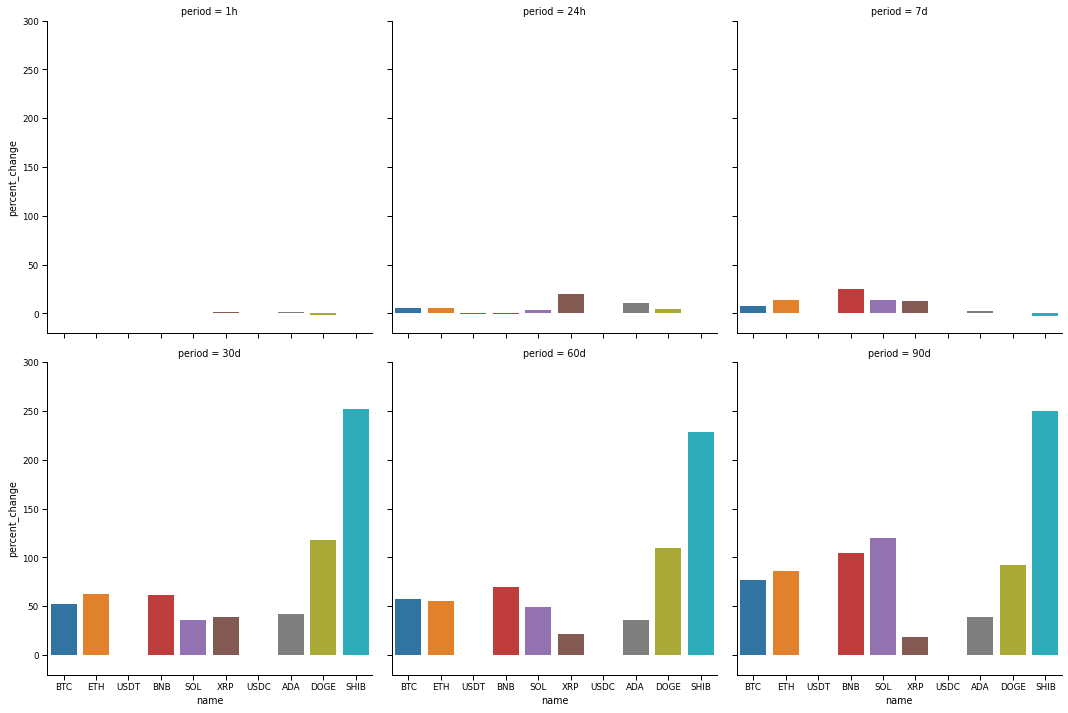

In [251]:
# making bar plots to show the percentage changes for each cryptocurrency over 6 different time periods
sns.catplot(x='name', y='percent_change', col='period', col_wrap=3,
            hue='name', data=df_pct_change, kind='bar',
            dodge=False).set_xticklabels(df_symbol[0]).set(ylim=(-20, 300))

In [247]:
# create time series dataset of price
df_usd_price=df[['name','quote.USD.price','timestamp']]
df_usd_price

,name,quote.USD.price,timestamp
0,Bitcoin,72715.12471,2024-03-11 22:22:59.283035+00:00
1,Ethereum,4060.65955,2024-03-11 22:22:59.283035+00:00
2,Tether USDt,1.00021,2024-03-11 22:22:59.283035+00:00
3,BNB,521.66871,2024-03-11 22:22:59.283035+00:00
4,Solana,148.02521,2024-03-11 22:22:59.283035+00:00
5,XRP,0.72763,2024-03-11 22:22:59.283035+00:00
6,USDC,0.99949,2024-03-11 22:22:59.283035+00:00
7,Cardano,0.78469,2024-03-11 22:22:59.283035+00:00
8,Dogecoin,0.17720,2024-03-11 22:22:59.283035+00:00
9,Shiba Inu,0.00003,2024-03-11 22:22:59.283035+00:00


In [248]:
# Create individual timeseries datasets for the top 4 coins
df_bit=df_usd_price.query("name=='Bitcoin'")
df_eth=df_usd_price.query("name=='Ethereum'")
df_usdt=df_usd_price.query("name=='Tether USDt'")
df_bnb=df_usd_price.query("name=='BNB'")

In [250]:
# rename all the price columns for clarity
df_bit2=df_bit.rename(columns = {'quote.USD.price':'price'}) 
df_eth2=df_eth.rename(columns = {'quote.USD.price':'price'})
df_usdt2=df_usdt.rename(columns = {'quote.USD.price':'price'})
df_bnb2=df_bnb.rename(columns = {'quote.USD.price':'price'})

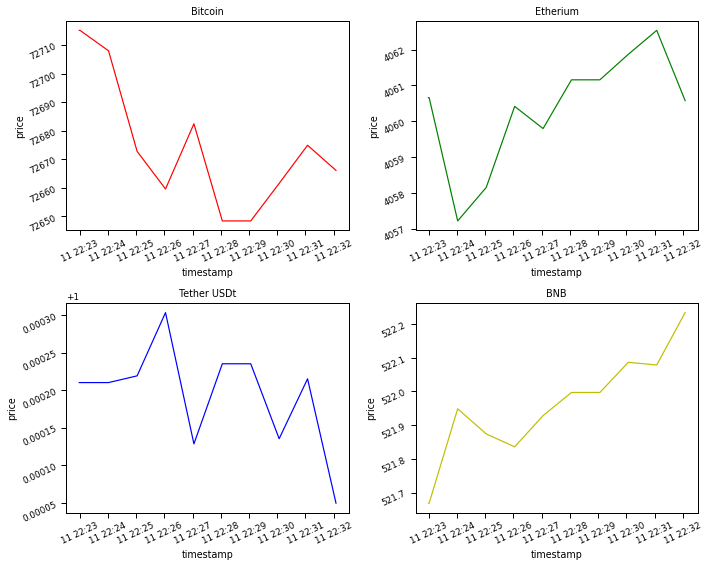

In [151]:
# Create timeseries subplots for each of the 4 cryptocurrencies
df_bit2 = df_bit2.reset_index()
df_eth2 = df_eth2.reset_index()
df_usdt2 = df_usdt2.reset_index()
df_bnb2 = df_bnb2.reset_index()

fig,ax =  plt.subplots( 2, 2, 
                       figsize = ( 10, 8)) 
  
sns.lineplot( x = 'timestamp', y = 'price',  
             color = 'r', data = df_bit2,  
             ax = ax[0][0]).set(title='Bitcoin')
  
ax[0][0].tick_params(labelrotation = 25) 
sns.lineplot( x = 'timestamp', y = 'price',  
             color = 'g', data = df_eth2, 
             ax = ax[0][1]).set(title='Etherium') 
  
ax[0][1].tick_params(labelrotation = 25) 
sns.lineplot(x = 'timestamp', y = 'price',  
             color = 'b', data = df_usdt2, 
             ax = ax[1][0]).set(title='Tether USDt')
  
ax[1][0].tick_params(labelrotation = 25) 
  
sns.lineplot(x = 'timestamp', y = 'price',  
             color = 'y', data = df_bnb2,  
             ax = ax[1][1]).set(title='BNB')
  
ax[1][1].tick_params(labelrotation = 25) 
fig.tight_layout(pad = 1.2) 

In [252]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10865,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19651693.00000,19651693.00000,False,NaN,1,None,None,None,2024-03-11T22:22:00.000Z,72715.12471,66696296581.51332,100.23680,0.72096,5.57448,7.68892,52.48426,56.93652,76.79858,1428975307196.78564,52.31900,1527017618844.97998,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
1,1027,Ethereum,ETH,ethereum,8525,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120098097.13109,120098097.13109,True,NaN,2,None,None,None,2024-03-11T22:22:00.000Z,4060.65955,29376024671.72441,102.09120,0.66428,5.45350,13.45288,62.57740,55.44684,86.51111,487677485152.57745,17.84330,487677485152.58002,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
2,825,Tether USDt,USDT,tether,77748,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,102018133001.26607,106797122778.30690,True,NaN,3,None,None,None,2024-03-11T22:21:00.000Z,1.00021,119890708156.49219,61.82180,-0.01828,-0.13580,-0.10390,-0.04402,0.02277,0.05060,102039577769.94405,3.73350,106819572116.73000,None,2024-03-11T22:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 22:22:59.283035+00:00
3,1839,BNB,BNB,bnb,2089,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149539855.75230,149539855.75230,False,NaN,4,None,None,None,2024-03-11T22:21:00.000Z,521.66871,4076523589.96859,-6.07790,0.14660,-0.51518,25.05244,61.49598,69.64344,104.06748,78010262897.12112,2.85460,78010262897.12000,None,2024-03-11T22:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443539100.46466,571695638.19124,True,NaN,5,None,None,None,2024-03-11T22:22:00.000Z,148.02521,5461425295.93180,68.43730,0.49651,3.92572,13.65801,35.37104,48.12197,119.87622,65654967014.47061,2.40220,84625364998.13000,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
5,52,XRP,XRP,xrp,1246,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,None,None,None,2024-03-11T22:22:00.000Z,0.72763,6625320496.01378,358.07000,2.00436,20.06521,12.05391,38.82176,20.74290,18.24214,39828120591.54875,1.45720,72762934440.36000,None,2024-03-11T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 22:22:59.283035+00:00
6,3408,USDC,USDC,usd-coin,17155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30431062203.02058,30431062203.02058,False,NaN,7,None,None,None,2024-03-11T22:22:00.000Z,0.99949,12275866834.49952,80.37060,0.02572,-0.04605,-0.05253,-0.05242,-0.05914,-0.06559,30415631987.53206,1.11300,30415631987.53000,None,2024-03-11T22:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 22:22:59.283035+00:00
7,2010,Cardano,ADA,cardano,1092,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35550840996.35800,36700287535.80100,False,NaN,8,None,None,None,2024-03-11T22:21:00.000Z,0.78469,1324229591.74543,114.64010,1.67049,10.02974,2.30840,41.38005,35.34541,39.20772,278

In [266]:
# create new dataset with subset of columns and clean 
df_clean =df[['name', 'symbol', 'circulating_supply', 'total_supply', 'infinite_supply', 'quote.USD.price'
             'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
              'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d',
              'timestamp']]

df_clean =df_clean..rename(columns = {'quote.USD.price':'price'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_1h': '1h_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_24h': '24_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_7d': '7d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_30d': '30d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_60d': '60d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_90d': '90d_percent_change'})

df_clean['timestamp'] =df_clean['timestamp'].dt.floor('Min')

df_clean

,name,symbol,circulating_supply,total_supply,infinite_supply,1h_percent_change,24_percent_change,7d_percent_change,30d_percent_change,60d_percent_change,90d_percent_change,timestamp
0,Bitcoin,BTC,19651693.00000,19651693.00000,False,0.72096,5.57448,7.68892,52.48426,56.93652,76.79858,2024-03-11 22:22:00+00:00
1,Ethereum,ETH,120098097.13109,120098097.13109,True,0.66428,5.45350,13.45288,62.57740,55.44684,86.51111,2024-03-11 22:22:00+00:00
2,Tether USDt,USDT,102018133001.26607,106797122778.30690,True,-0.01828,-0.13580,-0.10390,-0.04402,0.02277,0.05060,2024-03-11 22:22:00+00:00
3,BNB,BNB,149539855.75230,149539855.75230,False,0.14660,-0.51518,25.05244,61.49598,69.64344,104.06748,2024-03-11 22:22:00+00:00
4,Solana,SOL,443539100.46466,571695638.19124,True,0.49651,3.92572,13.65801,35.37104,48.12197,119.87622,2024-03-11 22:22:00+00:00
5,XRP,XRP,54736825690.00000,99987824103.00000,False,2.00436,20.06521,12.05391,38.82176,20.74290,18.24214,2024-03-11 22:22:00+00:00
6,USDC,USDC,30431062203.02058,30431062203.02058,False,0.02572,-0.04605,-0.05253,-0.05242,-0.05914,-0.06559,2024-03-11 22:22:00+00:00
7,Cardano,ADA,35550840996.35800,36700287535.80100,False,1.67049,10.02974,2.30840,41.38005,35.34541,39.20772,2024-03-11 22:22:00+00:00
8,Dogecoin,DOGE,143428506383.70520,143428506383.70520,True,-0.59865,4.68267,0.35374,117.50020,109.85373,92.32414,2024-03-11 22:22:00+00:00
9,Shiba Inu,SHIB,589289410812691.00000,589534086491242.25000,False,0.67530,0.58976,-2.58093,250.94059,227.54740,249.81939,2024-03-11 22:22:00+00:00


In [267]:
#Export Dataset to csv
df_clean.to_csv(r'/Users/jeremiahanderson/Documents/projects/python/crypto_api/crypto.csv', header='column_names')